# Econometria Aplicada

## Aula 1 - REGRESSÃO LINEAR: SIMPLES E MÚLTIPLA



João Ricardo Costa Filho \\
[joaocostafilho.com](https://)

## A regressão linear

**Motivação**: \\

Será que os salários dos CEOs estão associados ao retorno sobre o patrimônio (ROE)?

Vamos utilizar os dados do livro do Wooldrige e a aplicação em R do livro do Heiss. \\

* Heiss, F. (2020). Using R for introductory econometrics (pp. 216-217). Düsseldorf, Germany, 2nd edition.

### Pacotes

In [18]:
install.packages("wooldridge")           # pacote para obter os dados do livro Introductory Econometrics: A Modern Approach, 7e by Jeffrey M. Wooldridge

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
library(wooldridge)

### Dados

In [20]:
data(ceosal1) # base de dados

In [ ]:
?ceosal1

In [ ]:
head(ceosal1, 20)

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1095,20,27595.0,14.1,106.4,191,1,0,0,0,6.998509,10.225389
2,1001,32,9958.0,10.9,-30.6,13,1,0,0,0,6.908755,9.206132
3,1122,9,6125.9,23.5,-16.3,14,1,0,0,0,7.022868,8.720281
4,578,-9,16246.0,5.9,-25.7,-21,1,0,0,0,6.359574,9.695602
5,1368,7,21783.2,13.8,-3.0,56,1,0,0,0,7.221105,9.988894
6,1145,5,6021.4,20.0,1.0,55,1,0,0,0,7.043160,8.703075
7,1078,10,2266.7,16.4,-5.9,62,1,0,0,0,6.982863,7.726080
8,1094,7,2966.8,16.3,-1.6,44,1,0,0,0,6.997596,7.995239
9,1237,16,4570.2,10.5,-70.2,37,1,0,0,0,7.120444,8.427312


In [ ]:
str( ceosal1 ) # estrutura dos dados

'data.frame':	209 obs. of  12 variables:
 $ salary  : int  1095 1001 1122 578 1368 1145 1078 1094 1237 833 ...
 $ pcsalary: int  20 32 9 -9 7 5 10 7 16 5 ...
 $ sales   : num  27595 9958 6126 16246 21783 ...
 $ roe     : num  14.1 10.9 23.5 5.9 13.8 ...
 $ pcroe   : num  106.4 -30.6 -16.3 -25.7 -3 ...
 $ ros     : int  191 13 14 -21 56 55 62 44 37 37 ...
 $ indus   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ finance : int  0 0 0 0 0 0 0 0 0 0 ...
 $ consprod: int  0 0 0 0 0 0 0 0 0 0 ...
 $ utility : int  0 0 0 0 0 0 0 0 0 0 ...
 $ lsalary : num  7 6.91 7.02 6.36 7.22 ...
 $ lsales  : num  10.23 9.21 8.72 9.7 9.99 ...
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"


## Visualização dos dados

In [4]:
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


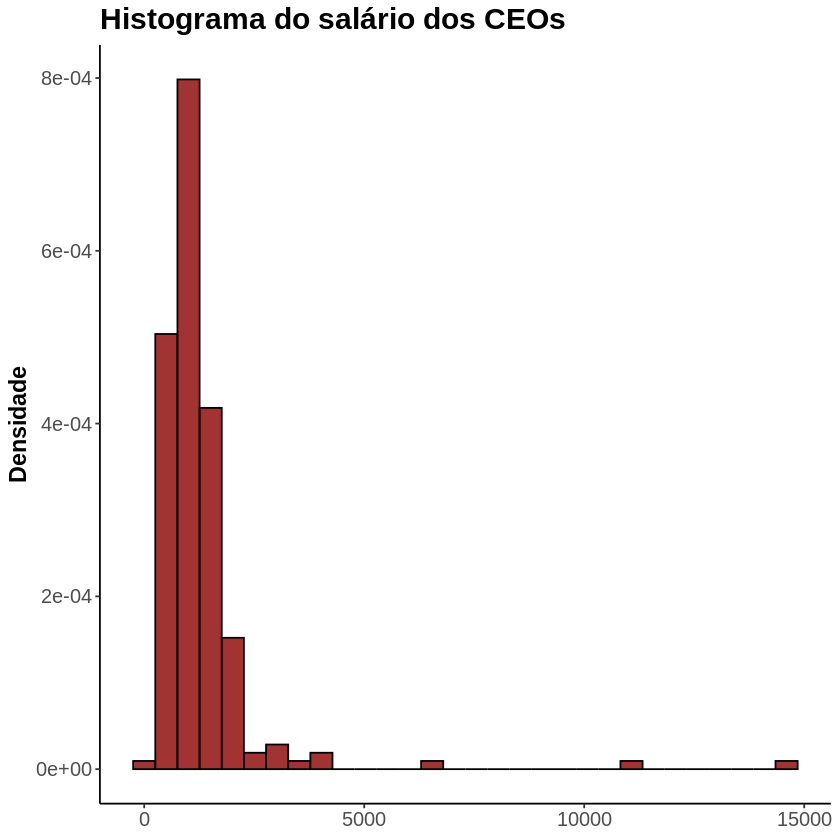

In [ ]:
ggplot(ceosal1) +
  geom_histogram(aes(x = salary, y = ..density..), color = "black", fill = "darkred", alpha = 0.8) +
    labs(title = "Histograma do salário dos CEOs", x = NULL, y = "Densidade") +
  theme_classic() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    strip.text = element_text(size = 12, face = "bold")
  )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


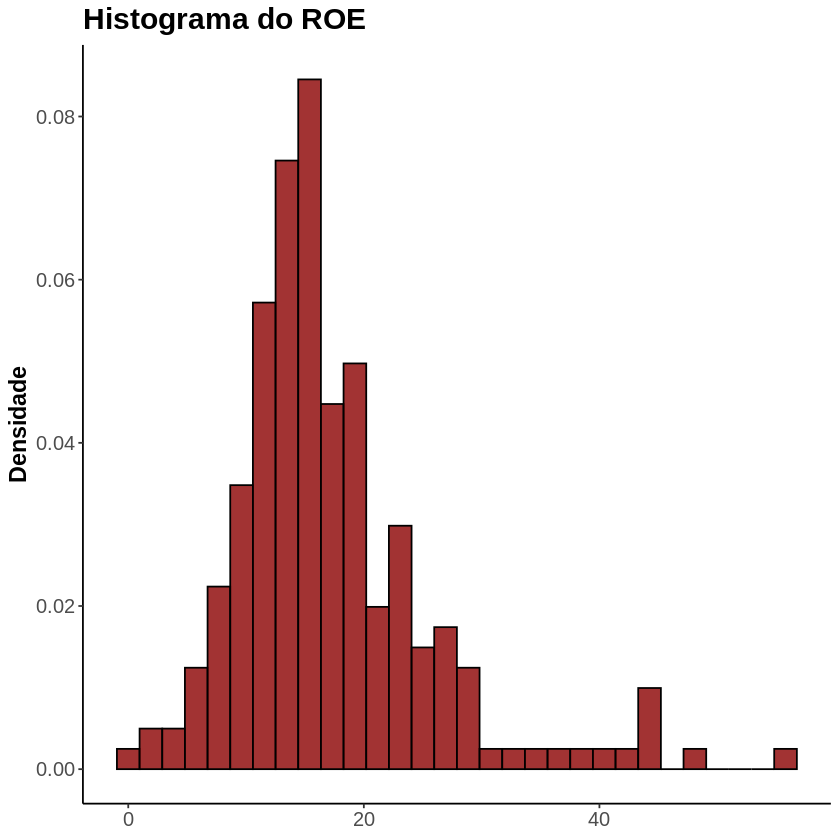

In [ ]:
ggplot(ceosal1) +
  geom_histogram(aes(x = roe, y = ..density..), color = "black", fill = "darkred", alpha = 0.8) +
    labs(title = "Histograma do ROE", x = NULL, y = "Densidade") +
  theme_classic() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    strip.text = element_text(size = 12, face = "bold")
  )

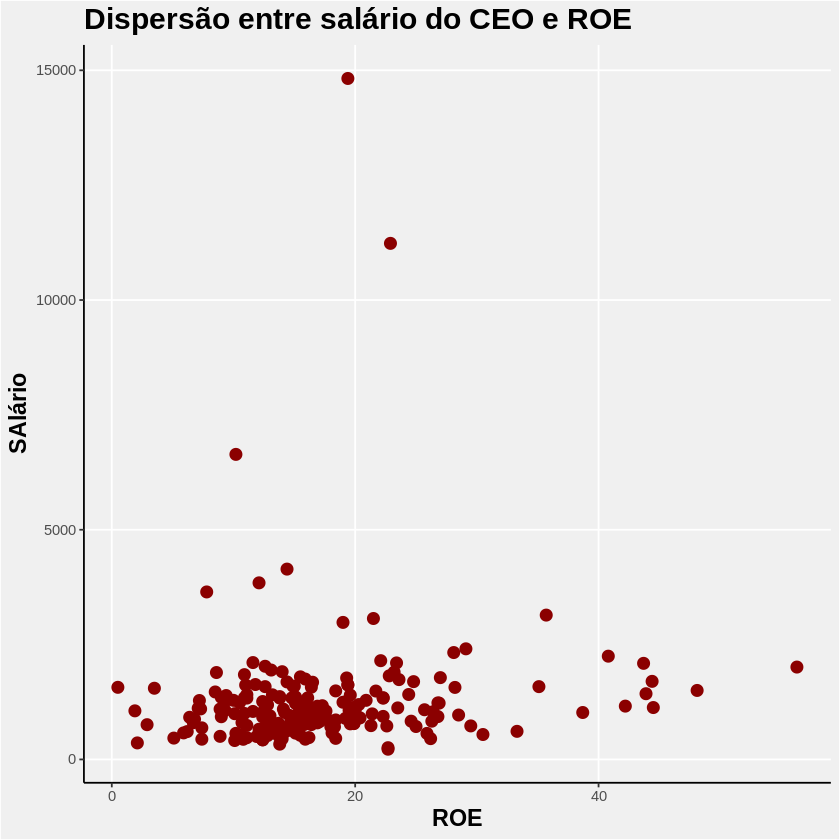

In [ ]:
ggplot(ceosal1, aes( x = roe, y = salary ) ) +
  geom_point( color = 'darkred', size = 3 ) + 
  labs(title = "Dispersão entre salário do CEO e ROE",
       x = "ROE",
       y = "Salário") +
         theme_classic() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_text(size = 14, face = "bold")
        ) +
  theme(panel.background = element_rect(fill = "#f0f0f0"),
        plot.background = element_rect(fill = "#f0f0f0"),
        panel.grid.major = element_line(colour = "white") )

Estatísticas descritivas

In [5]:
attach( ceosal1 )

In [ ]:
# Apenas para fins pedagógicos, vamos criar uma tabela com estatísticas descritivas da seguinte forma:

tabela = matrix( data = NA, ncol = 2, nrow = 4 )

colnames( tabela ) = c( "Salário", "ROE" )
rownames( tabela ) = c( "Média", "Variância", "Desvio-padrão", "Coeficiente de Variação" )

# média
tabela[1,1] = round( mean( salary ), 2 )
tabela[1,2] = round( mean( roe ), 2 )

# variância
tabela[2,1] = round( var( salary ), 2 )
tabela[2,2] = round( var( roe ), 2 )

# desvio-padrão
tabela[3,1] = round( sd( salary ), 2 )
tabela[3,2] = round( sd( roe ), 2 )

# coeficiente de variação
tabela[4,1] = round( sd( salary ) / mean( salary ), 2 )
tabela[4,2] = round( sd( roe ) / mean( roe ), 2 )

print( tabela )

                           Salário   ROE
Média                      1281.12 17.18
Variância               1883331.64 72.56
Desvio-padrão              1372.35  8.52
Coeficiente de Variação       1.07  0.50


In [ ]:
# Covariância (amostral)

print('Covariância entre salários e ROE')

round( cov( salary, roe ), 2 )

[1] "Covariância entre salários e ROE"


[1] 1342.54

In [ ]:
# Correlação (amostral)

print('Correlação entre salários e ROE')

round( cor( salary, roe ), 2 )

[1] "Correlação entre salários e ROE"


[1] 0.11

### Regressão

Queremos estimar a seguinte regressão: \\
\
$salario_i = \beta_0 + \beta_1 ROE_i + ɛ_i$


In [26]:
reg = lm( salary ~ roe, data = ceosal1)

summary( reg )


Call:
lm(formula = salary ~ roe, data = ceosal1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1160.2  -526.0  -254.0   138.8 13499.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   963.19     213.24   4.517 1.05e-05 ***
roe            18.50      11.12   1.663   0.0978 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1367 on 207 degrees of freedom
Multiple R-squared:  0.01319,	Adjusted R-squared:  0.008421 
F-statistic: 2.767 on 1 and 207 DF,  p-value: 0.09777


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


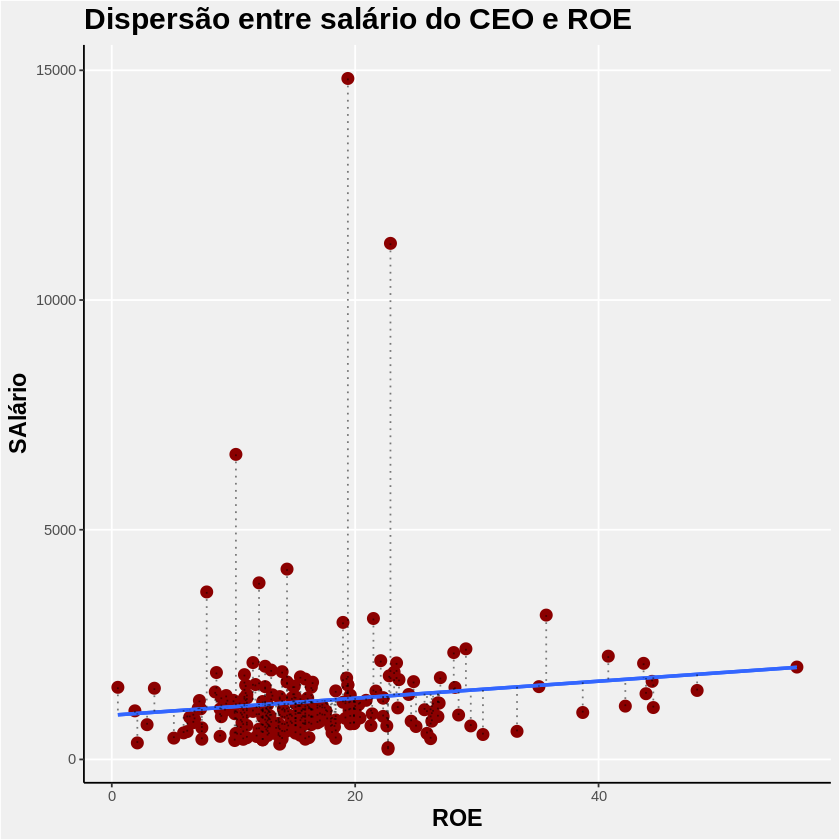

In [32]:
ggplot(ceosal1, aes( x = roe, y = salary ) ) +
  geom_point( color = 'darkred', size = 3 ) + 
  labs(title = "Dispersão entre salário do CEO e ROE",
       x = "ROE",
       y = "Salário") +
         theme_classic() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_text(size = 14, face = "bold")
        ) +
  theme(panel.background = element_rect(fill = "#f0f0f0"),
        plot.background = element_rect(fill = "#f0f0f0"),
        panel.grid.major = element_line(colour = "white") ) +
    stat_smooth(method = lm, se = FALSE) + 
     geom_smooth(method = lm, se = FALSE, fullrange = TRUE) +
  geom_segment(aes(x = roe, y = salary,
                   xend = roe, yend = predict(lm(salary ~ roe, data = ceosal1))),
               alpha = 0.5, linetype = "dotted")  


Ou seja, a relação que estimamos é tal que:

$\hat{salario} = 963.19 + 18.50 \text{ }ROE$.

Sendo assim, qual é o valor do salário **esperado** de um CEO cuja empresa tem um ROE de 20? E um ROE de 15? E de 10?

In [ ]:
s1 = reg$coefficients[1] + reg$coefficients[2] * 20
print( "Salário esperado de um CEO cujo ROE é 20")
round( s1, 2 ) 
print("")
print("")

s2 = reg$coefficients[1] + reg$coefficients[2] * 15
print( "Salário esperado de um CEO cujo ROE é 15")
round( s2, 2 )
print("")
print("")

s3 = reg$coefficients[1] + reg$coefficients[2] * 10
print( "Salário esperado de um CEO cujo ROE é 10")
round( s3, 2 )

[1] "Salário esperado de um CEO cujo ROE é 20"


(Intercept) 
    1333.22

[1] ""
[1] ""
[1] "Salário esperado de um CEO cujo ROE é 15"


(Intercept) 
    1240.71

[1] ""
[1] ""
[1] "Salário esperado de um CEO cujo ROE é 10"


(Intercept) 
     1148.2

E se quiséssemos fazer a regressão de maneira "manual"?

In [ ]:
b1 = cov( salary, roe) / var( roe )

b0 = mean( salary ) - b1 * mean( roe )

In [ ]:
s1 = b0 + b1 * 20
print( "Salário esperado de um CEO cujo ROE é 20")
round( s1, 2 ) 
print("")
print("")

s2 = b0 + b1 * 15
print( "Salário esperado de um CEO cujo ROE é 15")
round( s2, 2 )
print("")
print("")

s3 = b0 + b1 * 10
print( "Salário esperado de um CEO cujo ROE é 10")
round( s3, 2 )

[1] "Salário esperado de um CEO cujo ROE é 20"


[1] 1333.22

[1] ""
[1] ""
[1] "Salário esperado de um CEO cujo ROE é 15"


[1] 1240.71

[1] ""
[1] ""
[1] "Salário esperado de um CEO cujo ROE é 10"


[1] 1148.2

## Inferência

Como verificar se a associação entre as variáveis é estatísticamente significativa? Realizados testes de hipótese!

Para $\hat{ \beta}_0$: 

$\mathcal{H}_0: \beta_0 = 0$ \\
$\mathcal{H}_a: \beta_0 \neq 0$ \\

Para $\hat{ \beta}_1$: 

$\mathcal{H}_0: \beta_1 = 0$ \\
$\mathcal{H}_a: \beta_1 \neq 0$ \\

Vamos simular os dados:

In [ ]:
# Para replicarmos as variáveis pseudo aleatórias
set.seed(1301)

# Definindo os parâmetros

amostras <- 500 # número de amostras

n <- 200        # tamanho de cada amostra

b0 <- 2

b1 <- 3

# Criando as amostras

X <- replicate( amostras, rnorm( n, mean = 10, sd = 2 ) )

print( "Variável X: linhas e colunas")

nrow( X ) # numero de linhas
ncol( X ) # número de colunas

e <- replicate( amostras, rnorm( n, mean = 0, sd = 1 ) )

Y <- b0 + b1 * X + e

print( "Variável Y: linhas e colunas")

nrow( Y ) # numero de linhas
ncol( Y ) # número de colunas

[1] "Variável X: linhas e colunas"


[1] 200

[1] 500

[1] "Variável Y: linhas e colunas"


[1] 200

[1] 500

In [ ]:
# Fazendo as regressões

regressoes <- lapply( 1:amostras, 
                      function(i) lm( Y[ , i ] ~ X[ , i ] ) )

betas <- sapply(regressoes, function(modelo) coef(modelo)[2])

beta1 = mean( betas )

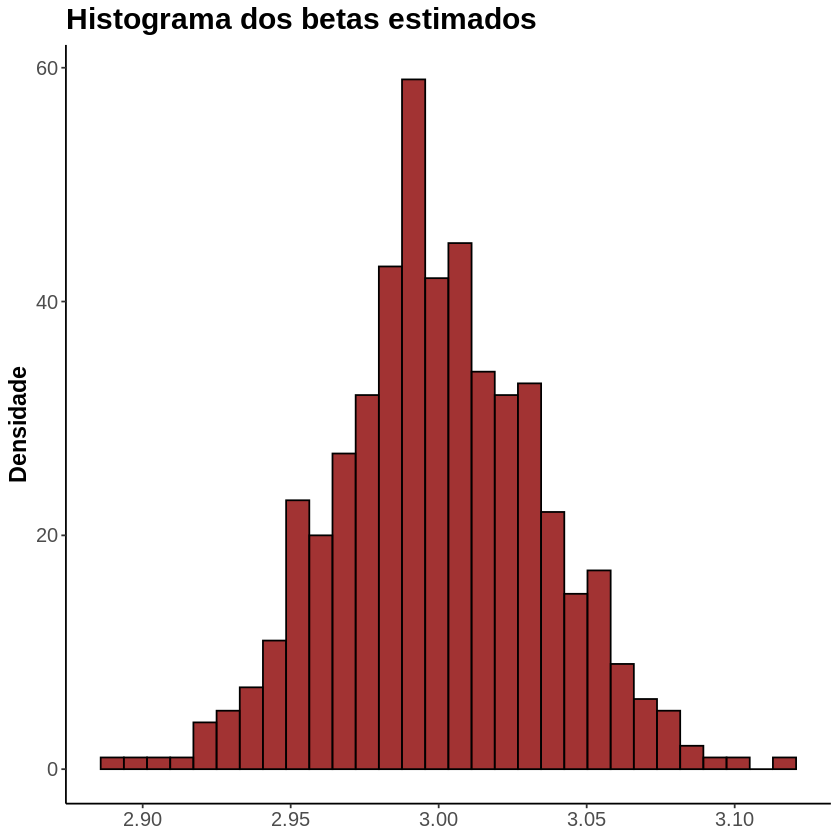

In [ ]:
# Gráfico dos betas
ggplot() +
  geom_histogram( aes(x = betas), bins = 30, color = "black", fill = "darkred", alpha = 0.8) +
  labs(title = "Histograma dos betas estimados", x = NULL, y = "Densidade") +
  theme_classic() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    strip.text = element_text(size = 12, face = "bold")
  )

E se aumentarmos o tamanho da amostra para 2000 elementos em cada uma das 500 amostras?

In [ ]:
# Para replicarmos as variáveis pseudo aleatórias
set.seed(13)

# Definindo os parâmetros

amostras <- 500 # número de amostras

n <- 2000        # tamanho de cada amostra

b0 <- 2

b1 <- 3

# Criando as amostras

X <- replicate( amostras, rnorm( n, mean = 10, sd = 2 ) )

e <- replicate( amostras, rnorm( n, mean = 0, sd = 1 ) )

Y <- b0 + b1 * X + e

In [ ]:
# Fazendo as regressões

regressoes <- lapply( 1:amostras, 
                      function(i) lm( Y[ , i ] ~ X[ , i ] ) )

betas <- sapply(regressoes, function(modelo) coef(modelo)[2])

beta1 = mean( betas )

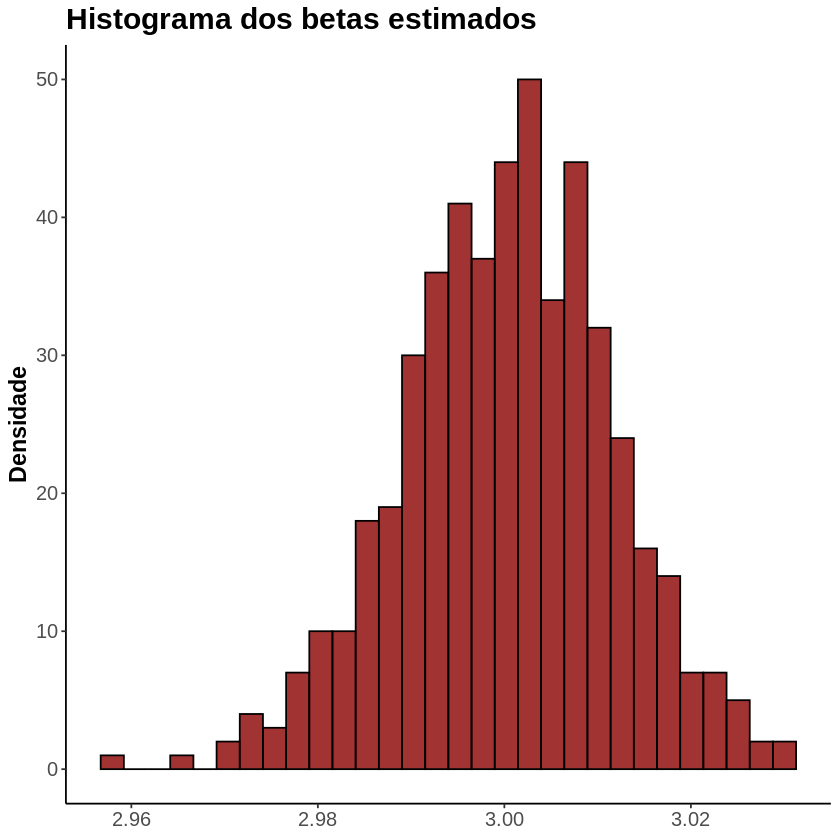

In [ ]:
# Gráfico dos betas
ggplot() +
  geom_histogram( aes(x = betas), bins = 30, color = "black", fill = "darkred", alpha = 0.8) +
  labs(title = "Histograma dos betas estimados", x = NULL, y = "Densidade") +
  theme_classic() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    strip.text = element_text(size = 12, face = "bold")
  )

Note que a variabilidade diminuiu!

Vamos verificar a consistência do estimador:

In [6]:
tamanhos = c( seq( from = 5, to = 90, by = 5 ),  seq( from = 100, to = 10000, by = 500 ) )

amostras = length( tamanhos ) # número de amostras

beta_mean = rep( NA, amostras )

for ( n in 1:amostras ) {
  
  set.seed( 13 + n )
  
  b0 <- 2
  
  b1 <- 3
  
  # Criando as amostras
  
  X <- replicate( amostras, rnorm( tamanhos[ n ], mean = 10, sd = 2 ) )
  
  e <- replicate( amostras, rnorm( tamanhos[ n ], mean = 0, sd = 1 ) )
  
  Y <- b0 + b1 * X + e
  
  regressoes <- lapply( 1:amostras, 
                        function(i) lm( Y[ , i ] ~ X[ , i ] ) )
  
  betas <- sapply(regressoes, function(modelo) coef(modelo)[2])
  
  beta_mean[ n ] = mean( betas ) - b1
  

}

NULL

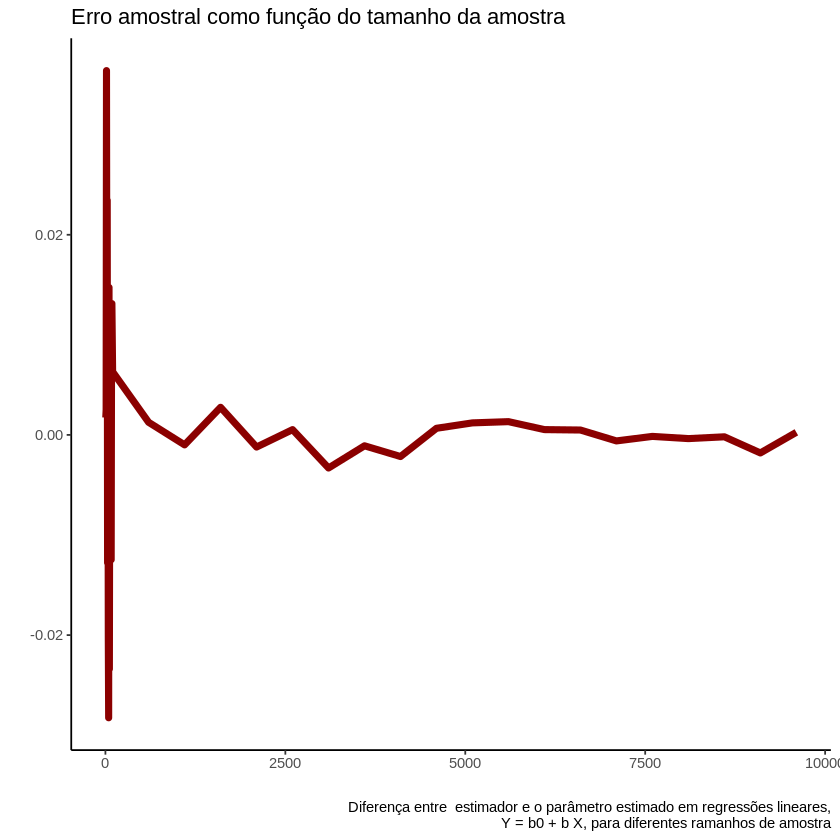

In [15]:
data = data.frame( beta_mean, tamanhos  )

ggplot(data) + 
  geom_line( aes(x = tamanhos, y = beta_mean), colour = "darkred", size = 2) +
  theme_classic() + 
  labs(   title = "Erro amostral como função do tamanho da amostra",
              x = "", 
              y = "",
        caption = "Diferença entre  estimador e o parâmetro estimado em regressões lineares,
                         Y = b0 + b X, para diferentes ramanhos de amostra" )

                           labs(, x = NULL, y = "Densidade") +
  theme_classic() +
  theme(
    plot.title = element_text(size = 24, face = "bold"),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 18),
    strip.text = element_text(size = 14, face = "bold") )

### Regressão linear múltipla

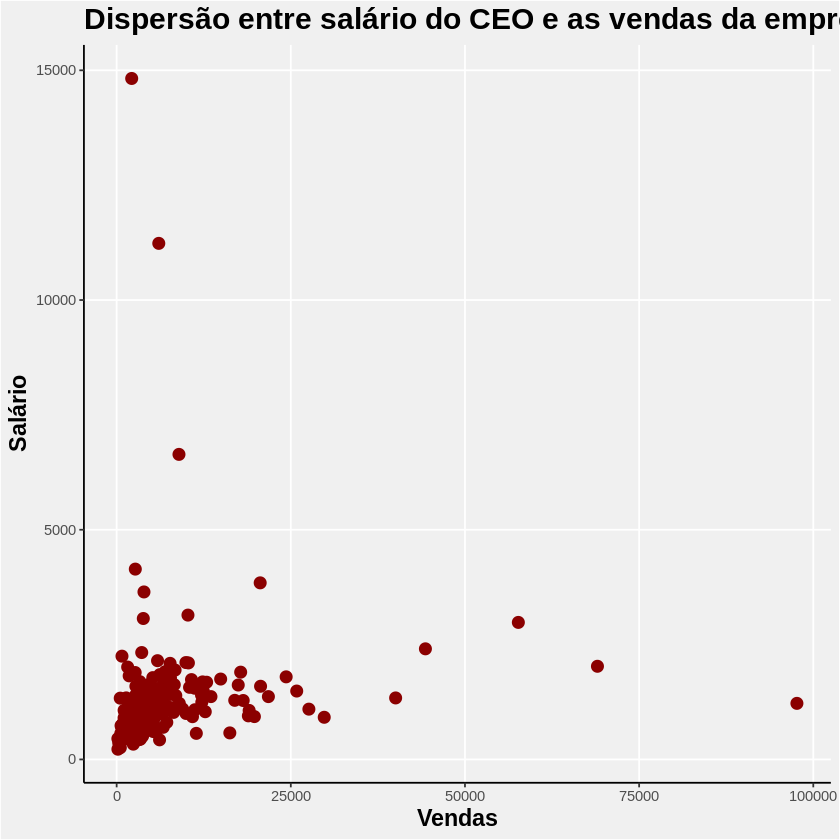

In [16]:
ggplot(ceosal1, aes( x = sales, y = salary ) ) +
  geom_point( color = 'darkred', size = 3 ) + 
  labs(title = "Dispersão entre salário do CEO e as vendas da empresa",
       x = "Vendas",
       y = "Salário") +
         theme_classic() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_text(size = 14, face = "bold")
        ) +
  theme(panel.background = element_rect(fill = "#f0f0f0"),
        plot.background = element_rect(fill = "#f0f0f0"),
        panel.grid.major = element_line(colour = "white") )

Queremos estimar a seguinte regressão: \\
\
$salario_i = \beta_0 + \beta_1 ROE_i + \beta_2 vendas_i + ɛ_i$


In [17]:
reg = lm( salary ~ roe + sales, data = ceosal1)

summary( reg )


Call:
lm(formula = salary ~ roe + sales, data = ceosal1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1501.8  -492.6  -232.0   123.3 13575.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.306e+02  2.239e+02   3.710 0.000267 ***
roe         1.963e+01  1.108e+01   1.772 0.077823 .  
sales       1.634e-02  8.874e-03   1.842 0.066973 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1359 on 206 degrees of freedom
Multiple R-squared:  0.02917,	Adjusted R-squared:  0.01975 
F-statistic: 3.095 on 2 and 206 DF,  p-value: 0.04739


### Teorema Frisch-Waugh-Lovell

In [22]:
# 1) Faça a regressão de 'salario' em 'ROE'.

reg = lm( salary ~ roe, data = ceosal1 )

#2) Calcule os resíduos da regressão do item (1).

e1 = reg$residuals

In [24]:
# 3) Faça a regressão de 'vendas' em 'ROE'.

reg = lm( sales ~ roe, data = ceosal1 )

#4) Calcule os resíduos da regressão do item (3).

e2 = reg$residuals

In [25]:
#5) Faça a regressão dos resíduos do item (1) nos resíduos do item (3) para extrair os efeitos parciais de 'vendas' em 'salario'

dat = data.frame( e1, e2 )

reg = lm( e1 ~ e2, data = dat )

summary( reg )


Call:
lm(formula = e1 ~ e2, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1501.8  -492.6  -232.0   123.3 13575.2 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -2.482e-14  9.376e+01   0.000   1.0000  
e2           1.634e-02  8.852e-03   1.846   0.0663 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1355 on 207 degrees of freedom
Multiple R-squared:  0.0162,	Adjusted R-squared:  0.01144 
F-statistic: 3.408 on 1 and 207 DF,  p-value: 0.06631


Note que o coeficiente de e2 é o mesmo coeficiente de 'sales' na regressão anterior.